<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Star_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/stars%20type.csv'
stars = pd.read_csv(url,error_bad_lines=False)
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
stars.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

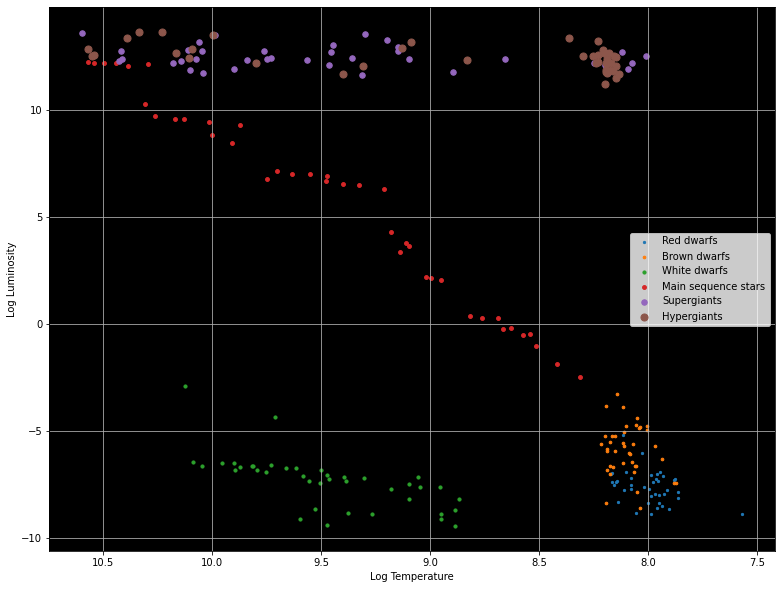

In [5]:
fig , ax = plt.subplots(figsize = (13,10))

R = stars[stars["Star type"] == 0]
B = stars[stars["Star type"] == 1]
W = stars[stars["Star type"] == 2]
M = stars[stars["Star type"] == 3]
S = stars[stars["Star type"] == 4]
H = stars[stars["Star type"] == 5]

ax.scatter(np.log(R["Temperature (K)"]), np.log(R["Luminosity(L/Lo)"]),5, label = 'Red dwarfs')
ax.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),7, label = 'Brown dwarfs')
ax.scatter(np.log(W["Temperature (K)"]), np.log(W["Luminosity(L/Lo)"]),10, label = 'White dwarfs')
ax.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),15, label = 'Main sequence stars')
ax.scatter(np.log(S["Temperature (K)"]), np.log(S["Luminosity(L/Lo)"]),30, label = 'Supergiants')
ax.scatter(np.log(H["Temperature (K)"]), np.log(H["Luminosity(L/Lo)"]),50, label = 'Hypergiants')

ax.invert_xaxis()
ax.legend()
plt.xlabel("Log Temperature")
plt.ylabel("Log Luminosity")
ax.grid()
ax.set_facecolor("black")

In [6]:
stars = stars.sample(frac=1) # shuffle the data
x = stars.drop("Star type", axis=1)
y = stars["Star type"]

In [7]:
categorical_features = ["Spectral Class","Star color"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(stars)
transformed_x 

<240x31 sparse matrix of type '<class 'numpy.float64'>'
	with 1640 stored elements in Compressed Sparse Row format>

In [8]:
x_train , x_test , y_train , y_test = train_test_split(transformed_x,y,test_size=0.2)
x_train

<192x31 sparse matrix of type '<class 'numpy.float64'>'
	with 1312 stored elements in Compressed Sparse Row format>

In [9]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
model.score(x_train,y_train)

1.0

In [11]:
x_test

<48x31 sparse matrix of type '<class 'numpy.float64'>'
	with 328 stored elements in Compressed Sparse Row format>

In [12]:
y_preds = model.predict(x_test)
y_preds

array([1, 5, 4, 0, 3, 3, 1, 1, 0, 5, 4, 2, 0, 3, 4, 5, 4, 4, 3, 1, 2, 1,
       0, 0, 4, 5, 4, 1, 5, 5, 3, 3, 2, 2, 3, 1, 0, 4, 2, 0, 1, 1, 1, 2,
       5, 3, 0, 1])

In [13]:
y_test

72     1
234    5
40     4
183    0
211    3
157    3
135    1
14     1
180    0
174    5
220    4
207    2
123    0
219    3
45     4
173    5
103    4
229    4
93     3
198    1
26     2
19     1
182    0
120    0
42     4
119    5
49     4
138    1
57     5
113    5
150    3
216    3
81     2
83     2
212    3
77     1
181    0
164    4
88     2
184    0
137    1
12     1
13     1
209    2
111    5
38     3
9      0
17     1
Name: Star type, dtype: int64

In [14]:
print(model.score(x_test,y_preds))

1.0
